In [2]:
import numpy as np
import pandas as pd
import notebook
import sys
from icecube import astro
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['grid.color'] = 'lightgrey'
mpl.rcParams['grid.alpha'] = 0.4
mpl.rcParams['grid.linewidth'] = 0.75
mpl.rcParams['lines.linewidth'] = 1.5

In [3]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')

In [18]:
novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])
    novae.append(a)

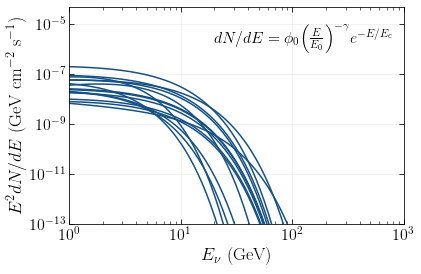

In [19]:
ens = np.logspace(-1.5, 2.2, 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, ens**2*spec, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-13, 5e-5)
plt.xlim(1e0, 1e3)
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel(r'$E^2 dN / dE$ (GeV cm$^{-2}$ s$^{-1}$)')
plt.text(2e1, 1e-6, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}e^{-E/E_c}$')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_with_cutoff.png', dpi=150, bbox_inches='tight')
plt.show()

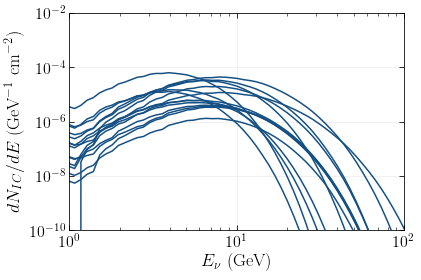

In [20]:
time_integrated = True
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$ s$^{-1}$)'
plt.ylabel(r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.0002901412859618441
0.0003357506851515421
5.600232573315678e-05
8.262604577361949e-05
4.0248992665801336e-05
0.00016548167048566505
0.0002517113319656344
4.5950307076937824e-05
0.0005332156200933539
5.634197139609076e-05
0.00019613289187914688
3.4217251691103785e-05
3.6665324435333676e-05
3.941252825654459e-05
1.2942542492136657e-05


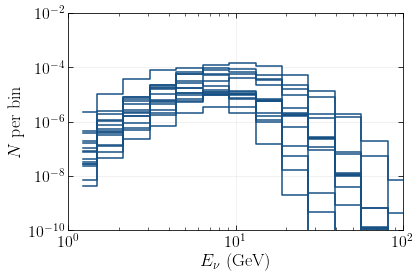

In [21]:
time_integrated = True
en_bins = np.logspace(0., 3., 20)
for nova in novae:
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = sns.xkcd_rgb['light navy'], where = 'mid')
    print dnde[1]
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_binned_with_cutoff.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

In [22]:
def mids(arr):
    return arr[:-1] + (np.diff(arr) / 2.)

In [33]:
novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)

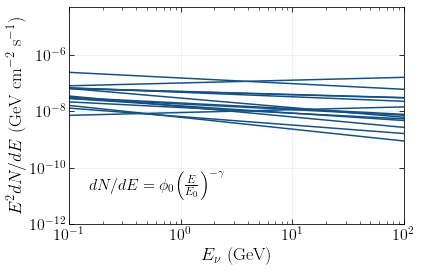

In [34]:
ens = np.logspace(-1.5, 2.2, 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, ens**2.* spec, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-12, 5e-5)
plt.xlim(1e-1, 1e2)
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel(r'$E^2 dN / dE$ (GeV cm$^{-2}$ s$^{-1}$)')
plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_powerlaw.png', dpi=150, bbox_inches='tight')
plt.show()

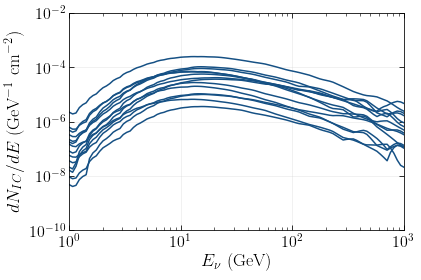

In [35]:
time_integrated = True
ens = np.logspace(0., 3., 100)
for nova in novae:
    dnde = nova.calc_dNdE(ens, time_integrated=time_integrated)
    plt.plot(ens, dnde, c = sns.xkcd_rgb['light navy'])
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e3)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$)'
else:
    ylabstr = r'$dN_{IC} / dE$ (GeV$^{-1}$ cm$^{-2}$ s$^{-1}$)'
plt.ylabel(ylabstr)
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_powerlaw.png', dpi=150, bbox_inches='tight')
plt.show()

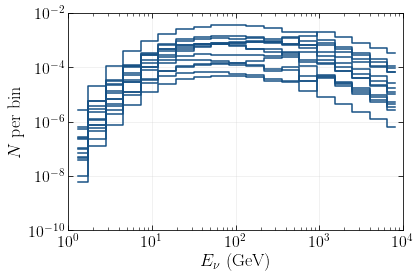

In [54]:
time_integrated = True
en_bins = np.logspace(0., 4., 20)
tot = 0
for nova in novae:
    if nova.name == 'V679 Car':
        continue
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = sns.xkcd_rgb['light navy'], where = 'mid')
    #print nova.name
    #print dnde[1] 
    #print '\n'
    tot += dnde[1]
    
plt.loglog()
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e4)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
plt.savefig('/home/apizzuto/public_html/novae/all_spectra_signal_binned_powerlaw.png', dpi=150, bbox_inches='tight')
#plt.text(1.5e-1, 1e-11, r'$dN / dE = \phi_0 \Bigg(\frac{E}{E_0}\Bigg)^{-\gamma}$')
plt.show()

0.009275815577889373
0.00033805532326004176


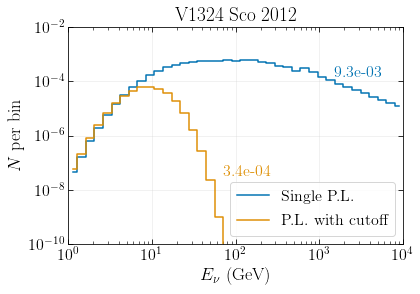

In [67]:
v1324sco = df.iloc[1]
row = v1324sco
sco_spl = Nova(row['Name'], -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
sco_epl = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])

time_integrated = True
en_bins = np.logspace(0., 4., 40)
tlocs = [(1.5e3, 1.5e-4), (7e1, 3e-8)]
names = ['Single P.L.', 'P.L. with cutoff']
colors = sns.color_palette('colorblind')

for ii, nova in enumerate([sco_spl, sco_epl]):
    dnde = nova.calc_expected_signal_binned(en_bins, time_integrated=time_integrated)
    plt.step(mids(en_bins), dnde[0], c = colors[ii], where = 'mid', label = names[ii])
    plt.text(tlocs[ii][0], tlocs[ii][1], '{:.1e}'.format(dnde[1]), color = colors[ii])
    print(dnde[1])
    
plt.loglog()
plt.legend(loc=4)
plt.ylim(1e-10, 1e-2)
plt.xlim(1e0, 1e4)
plt.xlabel(r'$E_{\nu}$ (GeV)')
if time_integrated:
    ylabstr = r'$N$ per bin'
else:
    ylabstr = r'$N$ per bin (s$^{-1}$)'
plt.ylabel(ylabstr)
plt.title(nova.name)
plt.savefig('/home/apizzuto/public_html/novae/comparing_{}_both_spectra.png'.format(nova.name.replace(' ', '_')), dpi=150, bbox_inches='tight')
plt.show()

In [62]:
tlocs[0][0]

70.0

(10.68, -9.560000000000002, 0.4743416490252569, 2.7248853186877424, -1.125)


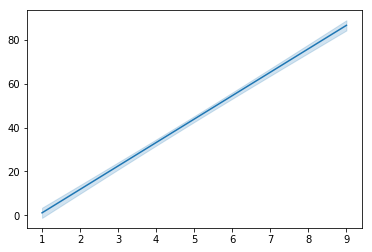

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1
x = np.array([1.,3.,5.,7.,9.])
y = np.array([2.2, 21., 40., 73., 83.])
sigma = 3.

x_bar = np.sum(x) / 5
y_bar = np.sum(y) / 5
xy_bar = np.sum(x*y) / 5
x_sq_bar = np.sum(x**2) / 5

m_hat = (xy_bar - x_bar * y_bar) / (x_sq_bar - x_bar ** 2)
c_hat = y_bar - m_hat * x_bar

sigma_m = np.sqrt((sigma ** 2) / (5 * (x_sq_bar - (x_bar ** 2))))
sigma_c = np.sqrt(((sigma ** 2) * x_sq_bar) / (5 * (x_sq_bar - (x_bar ** 2))))
cov_m_c = -((sigma ** 2) * x_bar) / (5 * (x_sq_bar - (x_bar ** 2)))

print(m_hat, c_hat, sigma_m, sigma_c, cov_m_c)

model_x = np.linspace(1,9,100)
model_y = m_hat * model_x + c_hat
plt.plot(model_x,model_y,'C0')

y_plus = model_y + np.sqrt(sigma_c ** 2 + sigma_m ** 2 * model_x ** 2 + 2 * model_x * cov_m_c)
y_minus = model_y - np.sqrt(sigma_c ** 2 + sigma_m ** 2 * model_x ** 2 + 2 * model_x * cov_m_c)

#plt.plot(model_x,y_plus,'C0')
#plt.plot(model_x,y_minus,'C0')
plt.fill_between(model_x, y_plus, y_minus, color='C0', alpha=0.2)

#plt.plot(x,y,'k')

plt.show()